# [KNN]
유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.
## 1. 데이터 구성하기

In [2]:
#패키지 불러오기

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl

from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

import graphviz


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

#경고창 제거
import warnings
warnings.filterwarnings('ignore')

#한글 적용
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
mpl.rc('font',family= 'Malgun Gothic')
font_manager.get_fontconfig_fonts()
fontname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

In [3]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2/유방암.csv')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#결측치 확인
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
df_raw.shape

(569, 31)

In [6]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis', axis=1, inplace=False)

#데이터 분할하기
df_train_x1,df_test_x,df_train_y1,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                              test_size=0.3, random_state=1234)
df_train_x,df_val_x,df_train_y,df_val_y = train_test_split(df_train_x1,df_train_y1,
                                                          test_size=3/7, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


## 2. 모델 생성

In [7]:
#기본 모델 생성
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(knn_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.956
Accuracy on validation set:0.918


In [8]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
#이웃 수 증가에 다른 정확도 변화

train_accuracy = []; val_accuracy = []
para_n_neighbors = [i for i in range(3,31)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    val_accuracy.append(knn.score(df_val_x, df_val_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['ValidationAccuracy'] = val_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,ValidationAccuracy
0,3,0.960,0.918
1,4,0.952,0.924
2,5,0.956,0.918
3,6,0.943,0.918
4,7,0.960,0.918
5,8,0.952,0.924
6,9,0.952,0.924
7,10,0.943,0.918
8,11,0.947,0.918
9,12,0.925,0.912


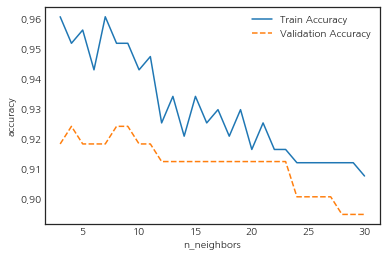

In [11]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_neighbors, val_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_neighbors')
plt.legend()

이웃 수 3부터 30까지 변화할 때마다 전체적으로 train과 test 데이터의 정확도는 감소한다.

두 데이터의 성능을 고려하여 4를 선택한다.

In [12]:
#가중치별 이웃 수 증가에 따른 정확도 변화

train_accuracy = []; val_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 2
para_weights = (['uniform']) * 10 + (['distance'] * 10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    val_accuracy.append(knn.score(df_val_x, df_val_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['ValidationAccuracy'] = val_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidationAccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.965,0.906
2,3,uniform,0.960,0.918
3,4,uniform,0.952,0.924
4,5,uniform,0.956,0.918
5,6,uniform,0.943,0.918
6,7,uniform,0.960,0.918
7,8,uniform,0.952,0.924
8,9,uniform,0.952,0.924
9,10,uniform,0.943,0.918


In [13]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index='Neighbors', columns='Weights',
                                                     values=['TrainAccuracy', 'ValidationAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           ValidationAccuracy          
Weights        distance   uniform           distance   uniform
Neighbors                                                     
1                   1.0  1.000000           0.900585  0.900585
2                   1.0  0.964758           0.900585  0.906433
3                   1.0  0.960352           0.923977  0.918129
4                   1.0  0.951542           0.918129  0.923977
5                   1.0  0.955947           0.912281  0.918129
6                   1.0  0.942731           0.912281  0.918129
7                   1.0  0.960352           0.912281  0.918129
8                   1.0  0.951542           0.918129  0.923977
9                   1.0  0.951542           0.918129  0.923977
10                  1.0  0.942731           0.918129  0.918129

In [14]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidationAccuracy_distance,ValidationAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.964758,0.900585,0.906433
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.951542,0.918129,0.923977
5,1.0,0.955947,0.912281,0.918129


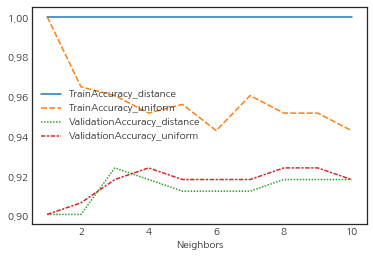

In [15]:
sns.lineplot(data = df_accuracy_weights_pivot)

가중치가 distance일 경우 train 데이터의 정확도는 1이다. 따라서 가중치는 uniform 으로 지정한다.

In [16]:
#거리 계산 방법별 이웃 수 증가에 따른 정확도 변화
train_accuracy =[]; val_accuracy =[]

para_n_neighbors = [i for i in range(1,11)] * 3

para_metric = ['minkowski'] * 10 + ['euclidean'] * 10  + ['manhattan'] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    val_accuracy.append(knn.score(df_val_x, df_val_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['ValidationAccuracy'] = val_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValidationAccuracy
0,1,minkowski,1.000,0.901
1,2,minkowski,0.965,0.906
2,3,minkowski,0.960,0.918
3,4,minkowski,0.952,0.924
4,5,minkowski,0.956,0.918
5,6,minkowski,0.943,0.918
6,7,minkowski,0.960,0.918
7,8,minkowski,0.952,0.924
8,9,minkowski,0.952,0.924
9,10,minkowski,0.943,0.918


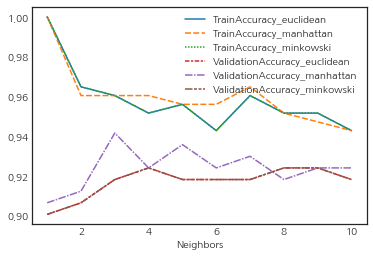

In [17]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index='Neighbors', columns='Metric',
                                                   values=['TrainAccuracy', 'ValidationAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_metric_pivot)

## 3. 결론 도출

In [18]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', metric = 'manhattan')
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set:{0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:0.960
Accuracy on test set:0.947
Confusion matrix:
[[103   2]
 [  7  59]]


* 예측 정확도 0.947
* 이웃 수 : 4
* 가중치 : 균일
* 거리 계산 : manhattan

### @모델에 대한 결과 해석@

**1. 기본 옵션으로 생성된 모델은 과대적합의 문제가 조금 있다. 따라서 parameter 조정을 실시한다.**


**2. 이웃 수가 3~30으로 변화할 때마다 전체적인 정확도는 감소함을 볼 수 있었고, 둘의 성능을 고려했을 때 적절한 이웃 수를 4로 설정하였다.**


**3. 또한 정확도는 94.7%로  높은 정확도가 나왔기때문에 암진단에 사용하기에 적절하다고 생각된다.**